In [0]:
#Importing the dataset from the google drive link directly
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#id is the corresponding id for the IdentifyTheApparels file
download = drive.CreateFile({'id': '1RI0loUSA8eVdJGl6xq0fl-Pw2_IaqT00'})

In [0]:
#download.GetContentFile('train_LbELtWX.zip')
#!unzip train_LbELtWX.zip

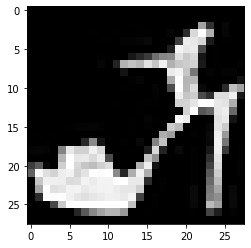

In [21]:
#Test to check the images in the training dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("train/10.png")
plt.imshow(image)
plt.show()

In [0]:
#!unzip test_ScVgIM0.zip

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [0]:
train = pd.read_csv('train.csv')

In [25]:
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train/'+train['id'][i].astype('str')+'.png', target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

  0%|          | 0/60000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 60000/60000 [00:22<00:00, 2709.35it/s]


In [0]:
y=train['label'].values
y = to_categorical(y)

In [0]:
#Validation dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [0]:
#Model structure defination
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [34]:
#Training the model and validating it on validation set
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 152s 3ms/step - loss: 0.3068 - acc: 0.8897 - val_loss: 0.2469 - val_acc: 0.9072
Epoch 2/5
48000/48000 [==============================] - 152s 3ms/step - loss: 0.2650 - acc: 0.9028 - val_loss: 0.2461 - val_acc: 0.9074
Epoch 3/5
48000/48000 [==============================] - 155s 3ms/step - loss: 0.2373 - acc: 0.9112 - val_loss: 0.2253 - val_acc: 0.9153
Epoch 4/5
48000/48000 [==============================] - 154s 3ms/step - loss: 0.2156 - acc: 0.9209 - val_loss: 0.2283 - val_acc: 0.9157
Epoch 5/5
48000/48000 [==============================] - 154s 3ms/step - loss: 0.1982 - acc: 0.9258 - val_loss: 0.2187 - val_acc: 0.9218


In [37]:
test = pd.read_csv('test.csv')
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('test/'+test['id'][i].astype('str')+'.png', target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

  0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 10000/10000 [00:03<00:00, 2748.43it/s]


In [0]:
# making predictions
prediction = model.predict_classes(test)

In [47]:
prediction.size

10000

In [0]:
# creating submission file
sample = pd.read_csv('sample_submission_I5njJSF.csv')
sample['label'] = prediction
sample.to_csv('sample_cnn.csv', header=True, index=False)

In [41]:
sample

,id,label
0,60001,9
1,60002,2
2,60003,1
3,60004,1
4,60005,6
...,...,...
9995,69996,9
9996,69997,1
9997,69998,8
9998,69999,1
